# Shipping Route Analysis

## Learning Goals:
+ Basic data visualization (e.g., heatmap)
+ Data Wrangling (e.g., groupby and merge)
+ Mapping (e.g., open street map)

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings
warnings.filterwarnings('ignore')

In [90]:
df=pd.read_excel("shipping data.xlsx")
df.info() 

#1000 sample records from (NJ,PA,NY)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from_city   1000 non-null   object 
 1   from_state  1000 non-null   object 
 2   from_lat    1000 non-null   float64
 3   from_lon    1000 non-null   float64
 4   to_city     1000 non-null   object 
 5   to_state    1000 non-null   object 
 6   to_lat      1000 non-null   float64
 7   to_lon      1000 non-null   float64
 8   Miles       1000 non-null   float64
dtypes: float64(5), object(4)
memory usage: 70.4+ KB


In [91]:
df.head()

,from_city,from_state,from_lat,from_lon,to_city,to_state,to_lat,to_lon,Miles
0,Elizabeth,NJ,40.67,-74.18,Penns grove,NJ,39.72,-75.46,106.78
1,Elizabeth,NJ,40.67,-74.18,Taylor,PA,41.39,-75.71,124.65
2,Elizabeth,NJ,40.67,-74.18,Taylor,PA,41.39,-75.71,124.65
3,Linden,NJ,40.62,-74.23,York,PA,40.01,-76.64,183.60
4,Elizabeth,NJ,40.67,-74.18,Wyandanch,NY,40.74,-73.37,61.12


In [92]:
df.tail()

,from_city,from_state,from_lat,from_lon,to_city,to_state,to_lat,to_lon,Miles
995,Jersey city,NJ,40.7,-74.08,Jersey city,NJ,40.7,-74.08,5.5
996,Jersey city,NJ,40.7,-74.08,Jersey city,NJ,40.7,-74.08,5.5
997,Jersey city,NJ,40.7,-74.08,Jersey city,NJ,40.7,-74.08,5.5
998,Jersey city,NJ,40.7,-74.08,Jersey city,NJ,40.7,-74.08,5.5
999,Jersey city,NJ,40.7,-74.08,Jersey city,NJ,40.7,-74.08,5.5


In [93]:
#state-state
#data wrangling - groupby

table_states=df.groupby(['from_state','to_state'],as_index=False).agg({'Miles': np.size}) #count the number of trips
table_states=table_states.pivot(index='from_state', columns='to_state', values='Miles') #convert summary statistics to pivot table

Text(0.5, 1.0, 'Number of Trips')

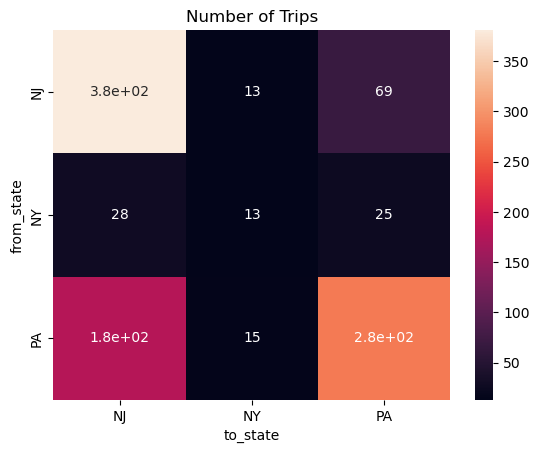

In [94]:
#heatmap
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

sns.heatmap(table_states, annot=True)
plt.title('Number of Trips')

#Major shipping routes: NJ<->PA

In [95]:
#city-city

table_cities=df.groupby(['from_city','from_state','to_city','to_state'],as_index=False).agg({'Miles': [np.mean, np.size]})
table_cities.columns=['from_city','from_state','to_city','to_state','average miles','number of trips']
table_cities=table_cities.sort_values(by='number of trips',ascending=False)
table_cities.head(10)

#Ports are likely to be either the origin or destination of a shipping route 

,from_city,from_state,to_city,to_state,average miles,number of trips
40,Elizabeth,NJ,Elizabeth,NJ,195.804700,217
115,Philadelphia,PA,Philadelphia,PA,145.194742,97
124,Quakertown,PA,Perth amboy,NJ,81.806824,85
82,Jersey city,NJ,Jersey city,NJ,26.677534,73
8,Bethlehem,PA,Harrisburg,PA,89.612969,64
13,Bethlehem,PA,Pottsville,PA,51.576154,26
63,Hazleton,PA,Fairless hills,PA,112.348800,25
87,Kearny,NJ,Kutztown,PA,101.128261,23
42,Elizabeth,NJ,Jersey city,NJ,186.347273,22
57,Hainesport,NJ,Wayne,NJ,85.441429,21


In [96]:
#Origin Cities

table_origin_cities=df.groupby(['from_city','from_state'],as_index=False).agg({'Miles': np.size})
table_origin_cities.columns=['from_city','from_state','number of trips']
table_origin_cities=table_origin_cities.sort_values(by='number of trips',ascending=False)

#add (lat,lon)

df2=df.groupby(['from_city','from_state'],as_index=False).agg({'from_lat': np.median, 'from_lon': np.median})
table_origin_cities=pd.merge(table_origin_cities,df2,on=['from_city','from_state'], how='left')

table_origin_cities.head(10)

,from_city,from_state,number of trips,from_lat,from_lon
0,Elizabeth,NJ,265,40.67,-74.18
1,Bethlehem,PA,146,40.59,-75.37
2,Quakertown,PA,132,40.43,-75.34
3,Philadelphia,PA,98,39.91,-75.15
4,Jersey city,NJ,92,40.70,-74.08
5,Hazleton,PA,64,40.96,-76.00
6,Kearny,NJ,43,40.75,-74.11
7,Hainesport,NJ,21,39.98,-74.82
8,Brooklyn,NY,15,40.71,-73.95
9,Friendship,NY,13,42.20,-78.14


In [97]:
#Map of Origin Cities

#https://plotly.com/python/scattermapbox/

fig = px.scatter_mapbox(table_origin_cities, lat="from_lat", lon="from_lon", 
                        color="number of trips", size="number of trips", hover_name='from_city', hover_data=['number of trips'], title='Map of Origin Cities')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [98]:
#Destination Cities

table_destination_cities=df.groupby(['to_city','to_state'],as_index=False).agg({'Miles': np.size})
table_destination_cities.columns=['to_city','to_state','number of trips']
table_destination_cities=table_destination_cities.sort_values(by='number of trips',ascending=False)

#add (lat,lon)

df3=df.groupby(['to_city','to_state'],as_index=False).agg({'to_lat': np.median, 'to_lon': np.median})
table_destination_cities=pd.merge(table_destination_cities,df3,on=['to_city','to_state'], how='left')

table_destination_cities.head(10)

,to_city,to_state,number of trips,to_lat,to_lon
0,Elizabeth,NJ,233,40.67,-74.18
1,Philadelphia,PA,113,39.91,-75.15
2,Jersey city,NJ,106,40.70,-74.08
3,Perth amboy,NJ,85,40.52,-74.27
4,Harrisburg,PA,65,40.27,-76.88
5,Mount joy,PA,32,40.11,-76.50
6,Pottsville,PA,26,40.67,-76.20
7,Fairless hills,PA,25,40.17,-74.85
8,Kutztown,PA,23,40.52,-75.77
9,Swedesboro,NJ,22,39.74,-75.31


In [99]:
#Map of Destination Cities

fig = px.scatter_mapbox(table_destination_cities, lat="to_lat", lon="to_lon", 
                        color="number of trips", size="number of trips", hover_name='to_city', hover_data=['number of trips'], title='Map of Destination Cities')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [100]:
# Identify "abnormal" mileage - trips with multiple stops

# haversine - the shortest distance on the surface of a sphere
# https://en.wikipedia.org/wiki/Haversine_formula
# https://pypi.org/project/haversine/

from haversine import haversine, Unit

df['distance_haversine']=df['Miles'].copy()

for i in range(len(df)):
    df['distance_haversine'][i]=haversine((df['from_lat'][i],df['from_lon'][i]), (df['to_lat'][i],df['to_lon'][i]), unit='mi')

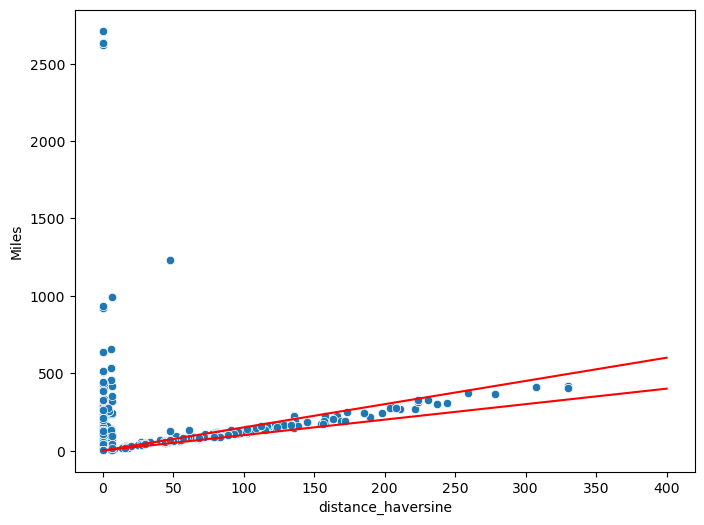

In [101]:
fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot()
sns.scatterplot(data=df, x='distance_haversine', y='Miles')
rho1=1 
rho2=1.5  #sqrt(2)=2/sqrt(2)

plt.plot([0,400], [0,400*rho1], 'r-') #shortest geo distance (below this line, wrong mileage)
plt.plot([0,400], [0,400*rho2], 'r-') #above this, multiple stops likely

plt.show()

In [102]:
#1000 records for (NJ,PA,NY)

np.sum(df['distance_haversine']>=df['Miles']) #wrong mileages

1

In [103]:
np.sum(1.5*df['distance_haversine']<=df['Miles']) #routes with multiple stops 

#half of shipping routes

466